In [36]:
import ReplayBuffer

In [37]:
import matplotlib.pyplot as plt
import matplotlib
import joblib
import os
import numpy as np
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns


In [38]:
max_error = 1.
err_treshold = .20

In [39]:
# colors = ["darkgreen", "green", "yellowgreen", "yellow", "gold","orange","darkorange","orangered", "red", "darkred"]
colors = ["midnightblue","navy", "cornflowerblue", "cyan","aquamarine", "greenyellow","yellow","darkorange","red","darkred","whitesmoke", "grey","darkslategrey", "black"]
nodes = [0.0, 0.022, 0.044, 0.066, 0.088, 0.11, 0.132, 0.156, 0.178, 0.2, 0.21, 0.3, 0.5, 1. ]
cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
# cmap = LinearSegmentedColormap.from_list("mycmap", colors)

In [40]:
colors2 = ["midnightblue","navy", "cornflowerblue", "cyan","aquamarine", "greenyellow","yellow","darkorange","red","darkred"]
# nodes = [0.0, 0.02, 0.8, 1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", colors2)

In [41]:
# cmap = cmap2
norm = matplotlib.colors.Normalize(vmin=0, vmax=max_error)

# cmap2 = matplotlib.cm.jet
norm2 = matplotlib.colors.Normalize(vmin=0, vmax=err_treshold)

# Feasible region calulcation

In [42]:
def calc_feasible_region(model_name, cmap, norm, cmap2, norm2):
    # global feasible_region, target_points
    rb = joblib.load(
        f'../runs/test/model_{model_name}/ReplayBuffer_test.joblib')

    model_name = model_name if not str(model_name).isnumeric() else model_name+1
    print(f'######### model_{model_name}')
    
    e = rb.mem_size-1
    com0_points = rb.state[:e][:, :3]
    target_points = rb.state[:e][:, 3:]
    reached_points = rb.next_state[:e][:, :3]
    target_error = np.linalg.norm(target_points - reached_points, axis=1)
    target_distance = np.linalg.norm(target_points-com0_points, axis=1)
    error = target_error/target_distance
    # avg_error = np.average(error)

#     # Draw target, reached merge
#     fig = fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(projection='3d')

#     ax.set_xlim(-.65, .65)
#     ax.set_ylim(-.65, .65)
#     ax.set_zlim(0, .5)

#     ax.view_init(45, 45)

#     ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2],
#                color="blue", alpha=0.6, edgecolors="black", linewidths=0.2)

#     ax.scatter(reached_points[:, 0], reached_points[:, 1], reached_points[:, 2],
#                color="red", alpha=0.6, edgecolors="black", linewidths=0.2)
    
#     ax.set_xlabel('$x$',fontsize=20)
#     ax.set_ylabel('$y$',fontsize=20)
#     ax.set_zlabel('$z$',fontsize=20)

#     fig.savefig(os.path.join('plots3', f'{model_name}_merge.svg'), dpi=200)
#     plt.show()

    # Draw target with relative error cbar
    fig = fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')

    ax.set_xlim(-.65, .65)
    ax.set_ylim(-.65, .65)
    ax.set_zlim(0, .5)

    ax.view_init(45, 45)
    test_distance = ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2],
                               c=error, alpha=0.7, edgecolors="black", linewidths=0.2,
                               cmap=cmap, norm=norm)
    if model_name == "latest":
        cbar = plt.colorbar(test_distance, shrink=0.5)
        cbar.set_label("percentage error [%]")
    ax.set_xlabel('$x$',fontsize=20)
    ax.set_ylabel('$y$',fontsize=20)
    ax.set_zlabel('$z$',fontsize=20)
    fig.savefig(os.path.join('plots5', f'{model_name}_complete.svg'), dpi=200)
    plt.tight_layout()
    plt.show()

    # Filter jump with .1 m error
    reachable_idx = target_points[:,2] < 0.4 # real reachable region
    
    idx = error <= err_treshold
    err_filter = error[idx]
    feasible_region = target_points[idx, :]
    n_of_point = len(err_filter)    

    fig = fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-.65, .65)
    ax.set_ylim(-.65, .65)
    ax.set_zlim(0, .5)
    ax.view_init(45, 45)
    feasible_filtered = ax.scatter(feasible_region[:, 0], feasible_region[:, 1], feasible_region[:, 2],
                                    c=err_filter, alpha=0.7, edgecolors="black", linewidths=0.2,
                                    cmap=cmap2, norm=norm2)
    if model_name == "latest":
        cbar = plt.colorbar(feasible_filtered, shrink=0.5)
        cbar.set_label("percentage error [%]")
    ax.set_xlabel('$x$',fontsize=20)
    ax.set_ylabel('$y$',fontsize=20)
    ax.set_zlabel('$z$',fontsize=20)
    fig.savefig(os.path.join('plots5', f'{model_name}_filtered.svg'), dpi=200)
    plt.tight_layout()
    plt.show()
    
    # top
    fig = fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-.65, .65)
    ax.set_ylim(-.65, .65)
    ax.set_zlim(0, .5)
    ax.view_init(azim=0,elev=90)
    feasible_filtered = ax.scatter(feasible_region[:, 0], feasible_region[:, 1], feasible_region[:, 2],
                                    c=err_filter, alpha=0.7, edgecolors="black", linewidths=0.2,
                                    cmap=cmap2, norm=norm2)
    if model_name == "latest":
        cbar = plt.colorbar(feasible_filtered, shrink=0.5)
        cbar.set_label("percentage error [%]")
    ax.set_xlabel('$x$',fontsize=20)
    ax.set_ylabel('$y$',fontsize=20)
    ax.set_zlabel('$z$',fontsize=20)
    fig.savefig(os.path.join('plots5', f'{model_name}_filtered_top.svg'), dpi=200)
    plt.tight_layout()
    plt.show()
    
    
    # side

    fig = fig = plt.figure(figsize=(11, 11))
    ax = fig.add_subplot(projection='3d')
    ax.margins(x=0,y=0,z=0)
    ax.set_xlim(-.65, .65)
    ax.set_ylim(-.65, .65)
    ax.set_zlim(0, .5)
    ax.view_init(0, 90)
    feasible_filtered = ax.scatter(feasible_region[:, 0], feasible_region[:, 1], feasible_region[:, 2],
                                    c=err_filter, alpha=0.7, edgecolors="black", linewidths=0.2,
                                    cmap=cmap2, norm=norm2)
    if model_name == "latest":
        cbar = plt.colorbar(feasible_filtered, shrink=0.5)
        cbar.set_label("percentage error [%]")
    ax.set_xlabel('$x$',fontsize=20)
    ax.set_ylabel('$y$',fontsize=20)
    ax.set_zlabel('$z$',fontsize=20)
    fig.savefig(os.path.join('plots5', f'{model_name}_filtered_side.svg'), dpi=200)
    plt.tight_layout()
    plt.show()

    return n_of_point, error


######### model_5000


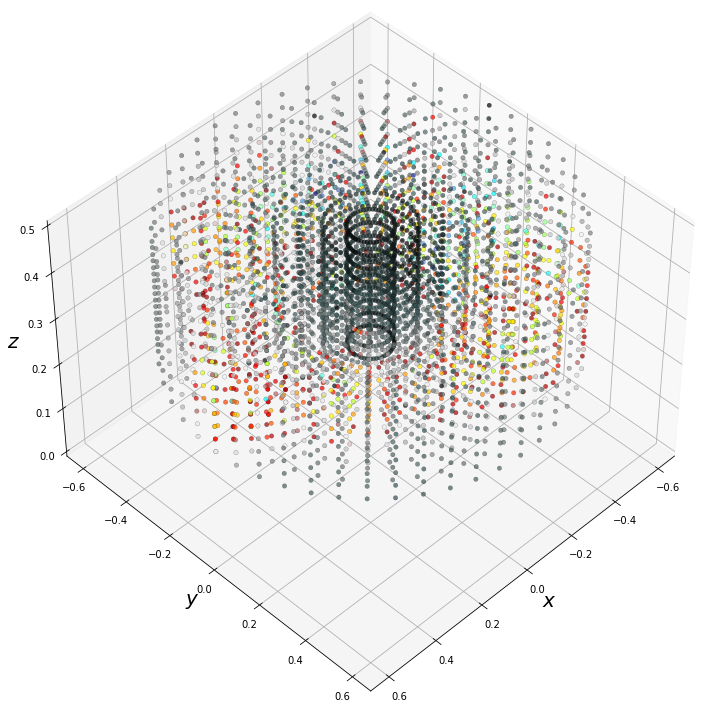

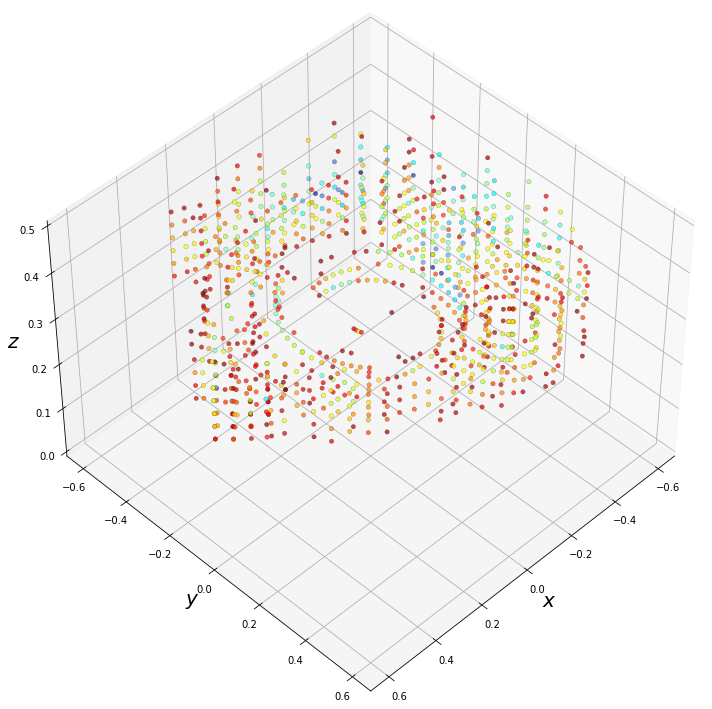

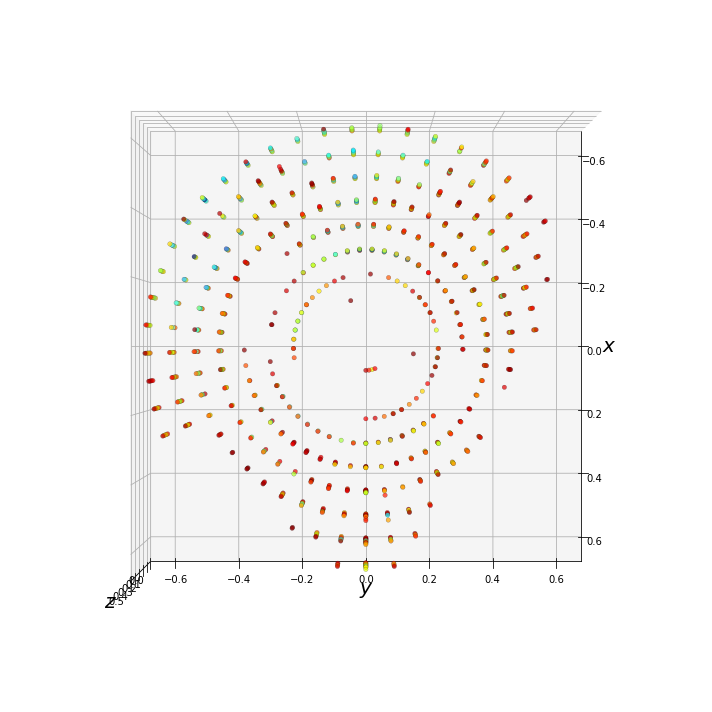

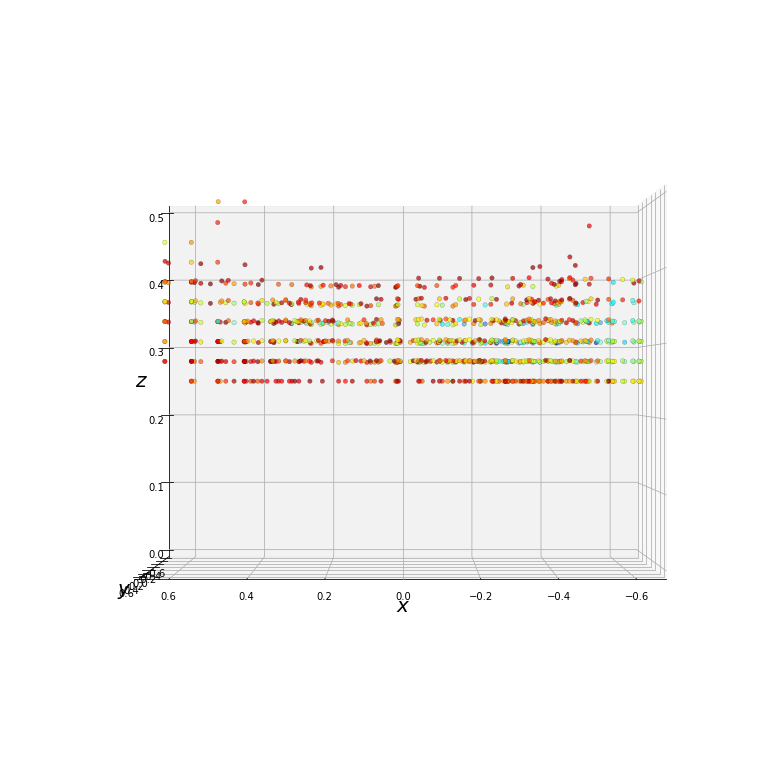

######### model_25000


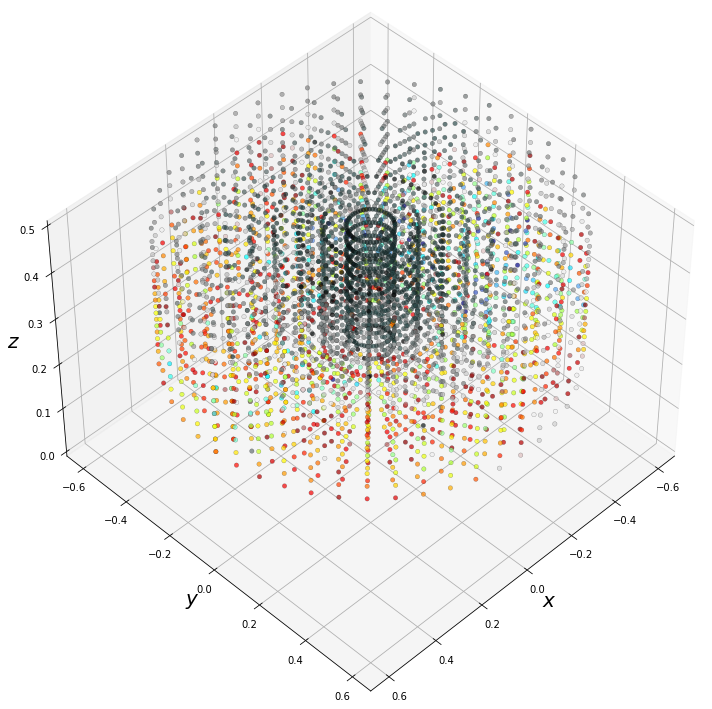

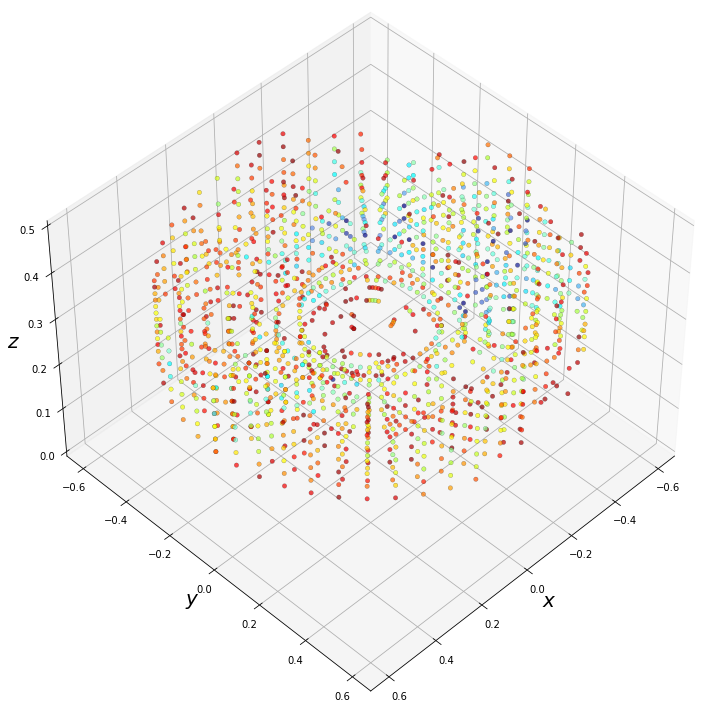

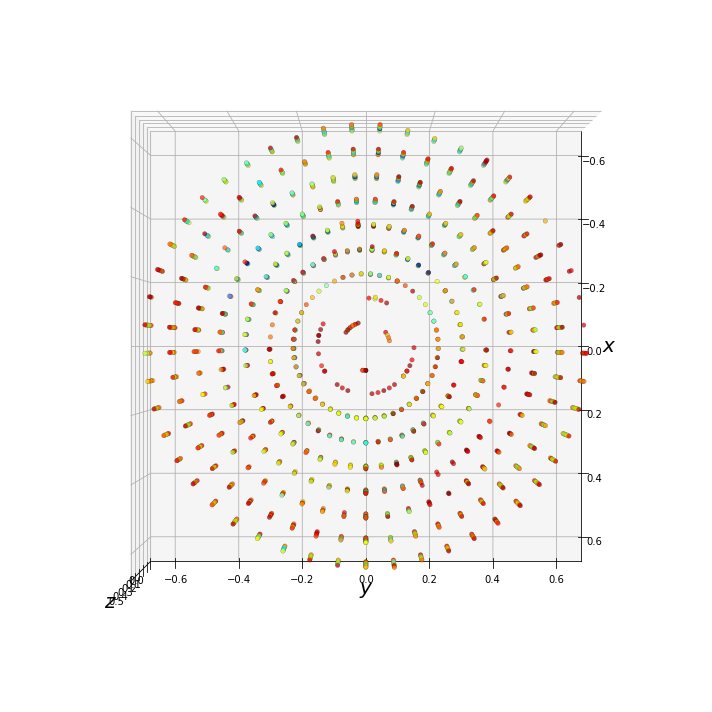

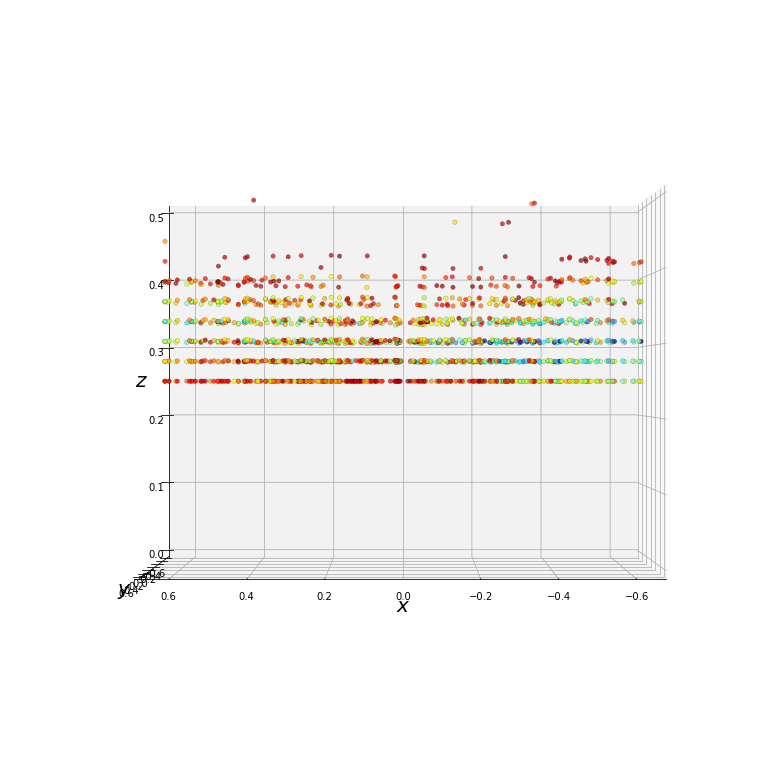

######### model_50000


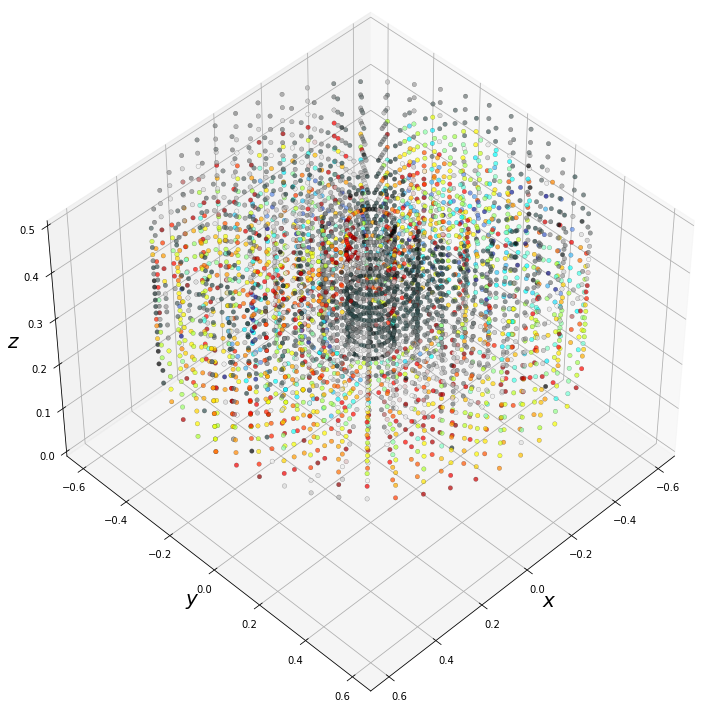

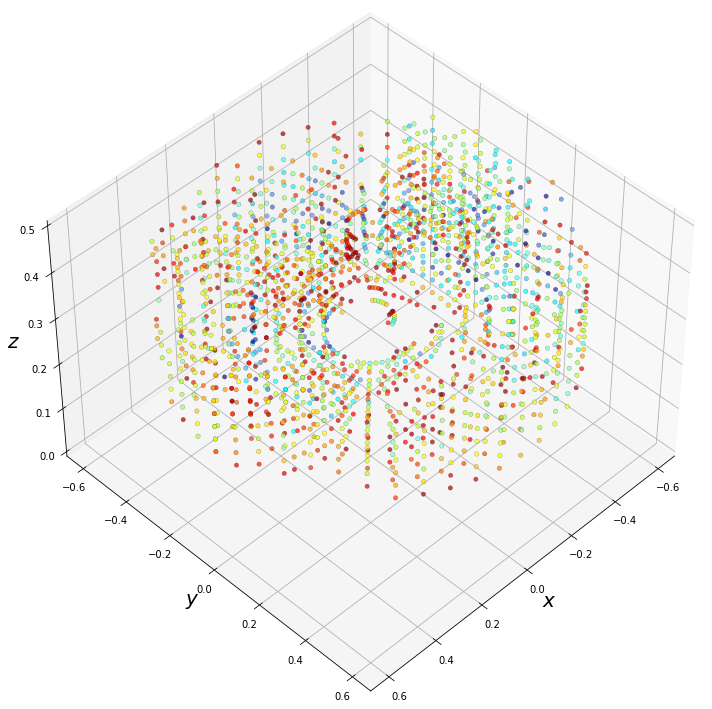

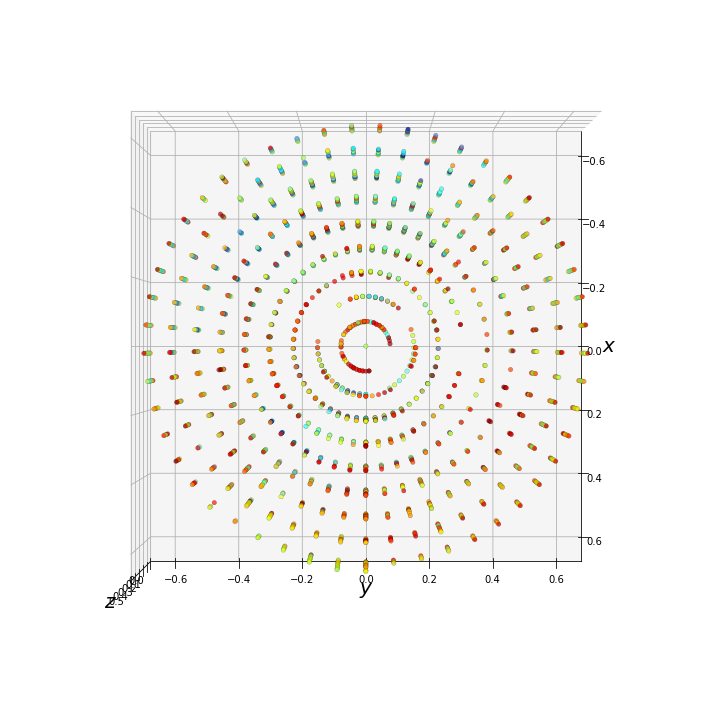

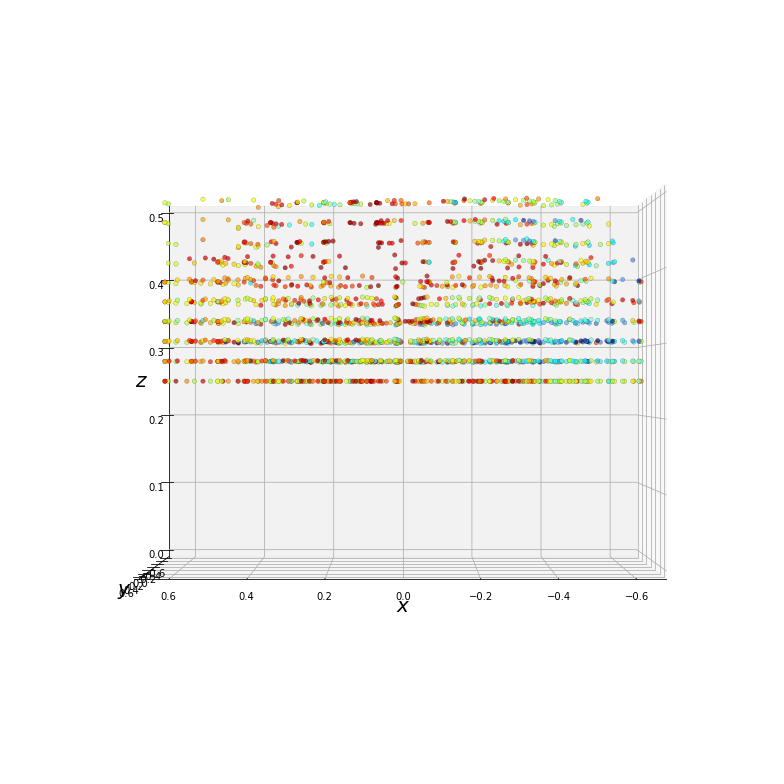

######### model_latest


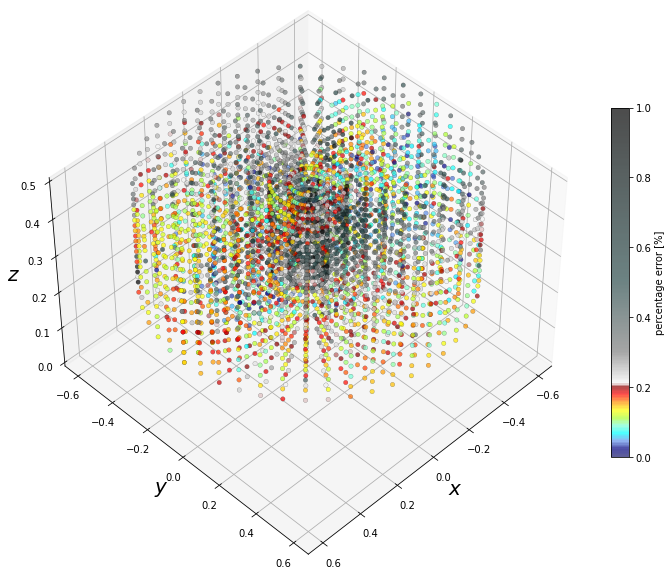

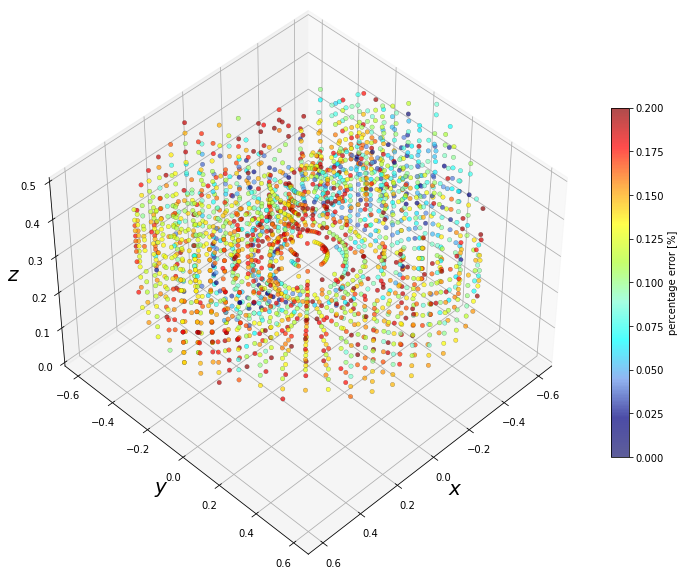

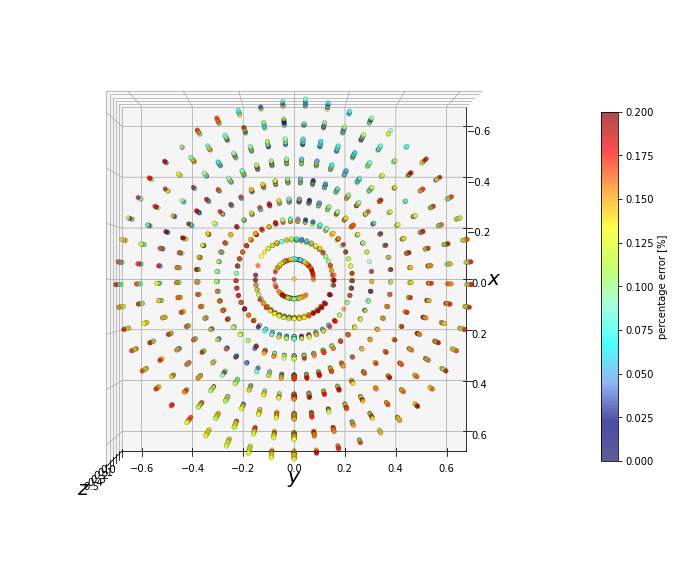

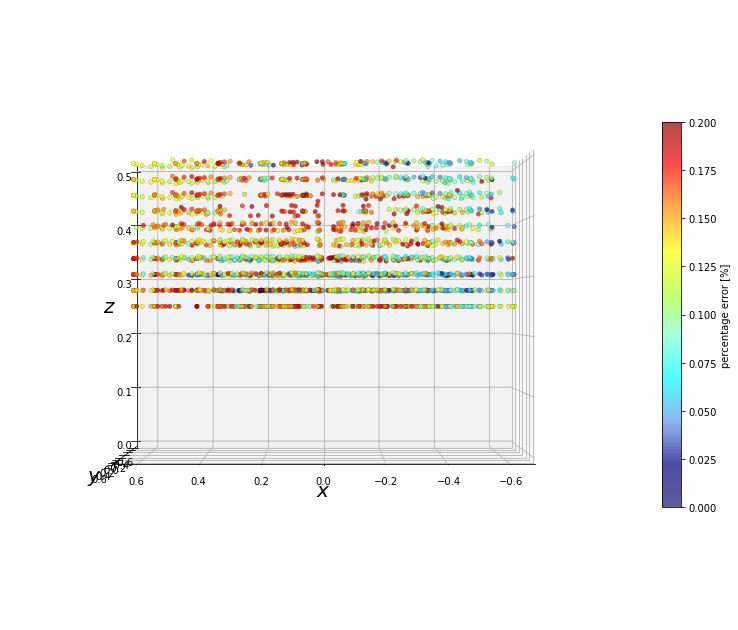

In [43]:
test = [4999,24999,49999,'latest']
results = [calc_feasible_region(epoch,cmap,norm,cmap2,norm2) for epoch in test]

In [44]:
n_point = np.array([i[0] for i in results])
n_point

array([1017, 1547, 1972, 2280])

In [45]:
norm_point = n_point/n_point[-1]

In [46]:
test[-1] = 85000

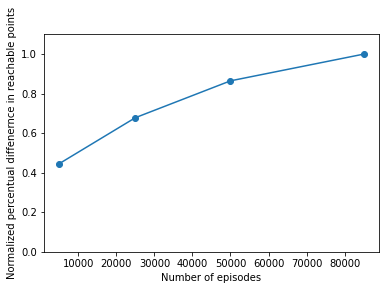

In [53]:
plt.ylim(0,1.1)
plt.plot(test,norm_point)
plt.scatter(test,norm_point)
plt.xlabel('Number of episodes')
plt.ylabel('Normalized percentual diffenernce in reachable points')
plt.savefig(os.path.join('plots5', 'normalized_percentual_points.svg'), dpi=200)

In [48]:
mean_error = np.array([i[1] for i in results])

In [49]:
mean_error.shape

(4, 4509)

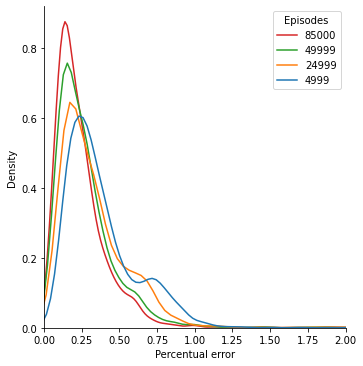

In [56]:
sns.displot([me for me in mean_error],kind='kde',fill=False,legend=False)
plt.legend(title="Episodes",labels=test[::-1])
plt.xlim(0,2)
plt.savefig('err_dist.jpg',dpi=200)
plt.xlabel('Percentual error')
plt.savefig(os.path.join('plots5', 'error_density.svg'), dpi=200)


In [51]:
np.mean(mean_error,axis=1)

array([0.37608745, 0.33023481, 0.27120577, 0.24279091])

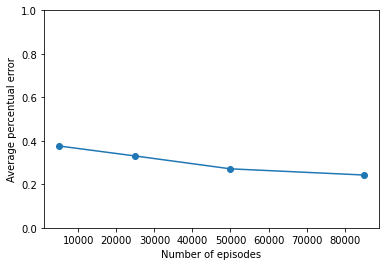

In [55]:
plt.ylim(0,1)
plt.plot(test,np.mean(mean_error,axis=1))
plt.scatter(test,np.mean(mean_error,axis=1))
plt.xlabel('Number of episodes')
plt.ylabel('Average percentual error')
plt.savefig(os.path.join('plots5', 'avg_error.svg'), dpi=200)
